In [116]:
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [117]:
epsilon = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001, 0.00000001]
a = 1000
maxit = 10000

In [118]:
f = lambda x1, x2: 100*(x2-x1**2)**2 + (1-x1)**2
f_diff = lambda x1, x2: np.array([100*4*(x1**3) - 100*4*x1*x2 + 2*x1 - 2, 100*2*(x2-x1**2)])
f_x0 = [-1.2, 1]

g = lambda x1, x2: x1**2 + (x1**2 + 1)*((x2**2-1)**2)
g_diff = lambda x1, x2: np.array([4*x1 + 2*x1*(x2**4) - 4*x1*(x2**2), 4*((x1**2)*(x2**3) + x2**3 - x2*(x1**2) - x2)])
g_x0 = np.array([-10, 30])


In [119]:
def armijo(f, gf, x):
    betta = 0.5
    gamma = 10e-4
    s = []
    s.append(1)
    x2 = x[1]
    x1 = x[0]
    i = 0
    while f(x1 + s[i]*(-gf(x1, x2)[0]), x2 + s[i]*(-gf(x1, x2)[1])) - f(x1, x2) >= s[i]*gamma*np.matmul(np.transpose(gf(x1, x2)), -gf(x1, x2)):
        i += 1
        s.append(betta**i)
    return s[-1]

In [120]:
def steepest(f, gf, x0, eps, maxit):
    i = 0
    x = []
    x.append(x0)
    while i < maxit:
        x.append(x[i] - armijo(f, gf, x[i])*gf(x[i][0], x[i][1]))
        if np.linalg.norm(x[i+1] - x[i])/np.linalg.norm(x[i+1]) < eps:
            break
        i += 1
    return x[-1], i, f(x[-1][0], x[-1][1])

In [121]:
def task_a_and_b():
    f1, f2, f3 = steepest(f, f_diff, f_x0, epsilon[7], 10000)
    g1, g2, g3 = steepest(g, g_diff, g_x0, epsilon[7], 10000)

    print(f"Minima of the Rosenbrock function: {np.round(f3, 5)}")
    print(f"Minima found in the point {np.round(f1, 3)}")
    print(f"Minima found in {f2} steps")
    print()
    print(f"Minima of the second function: {np.round(g3, 5)}")
    print(f"Minima found in the point {np.round(g1, 3)}")
    print(f"Minima found in {g2} steps")

In [122]:
def task_a_and_b_2():
    t = []
    tt = []
    for i in range(len(epsilon)):
        t.append(steepest(f, f_diff, f_x0, epsilon[i], 10000)[2])
        tt.append(steepest(g, g_diff, g_x0, epsilon[i], 10000)[2])
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    fig.suptitle('Minima for different epsilons', fontsize = 20)
    fig.tight_layout()

    ax1.set_title('Rosenbrock function')
    ax2.set_title('Second function')

    ax1.set_xlabel('Tolerance')
    ax1.set_ylabel('Minima')
    ax2.set_xlabel('Tolerance')
    ax2.set_ylabel('Minima')

    ax1.grid()
    ax2.grid()

    ax1.plot(epsilon, t, 'bo-.')
    ax1.set_yscale('log')
    ax1.set_xscale('log')
    ax2.plot(epsilon, tt, 'bo-.')
    ax2.set_yscale('log')
    ax2.set_xscale('log')

    fig.show()

    print("Note 1: I have decided to plot the accuracy of these two functions with growing epsilon in a logarithmic scale")
    print("Note 2: It shows very well that the less is the tolerance the less is the approximation error")
    print("Note 3: By changing a from 100 to 1000 nothing changes as we have our minima in (0,0) point")

Minima of the Rosenbrock function: 0.0
Minima found in the point [1. 1.]
Minima found in 10000 steps

Minima of the second function: 0.0
Minima found in the point [-0.  1.]
Minima found in 104 steps

Note 1: I have decided to plot the accuracy of these two functions with growing epsilon in a logarithmic scale
Note 2: It shows very well that the less is the tolerance the less is the approximation error
Note 3: By changing a from 100 to 1000 nothing changes as we have our minima in (0,0) point


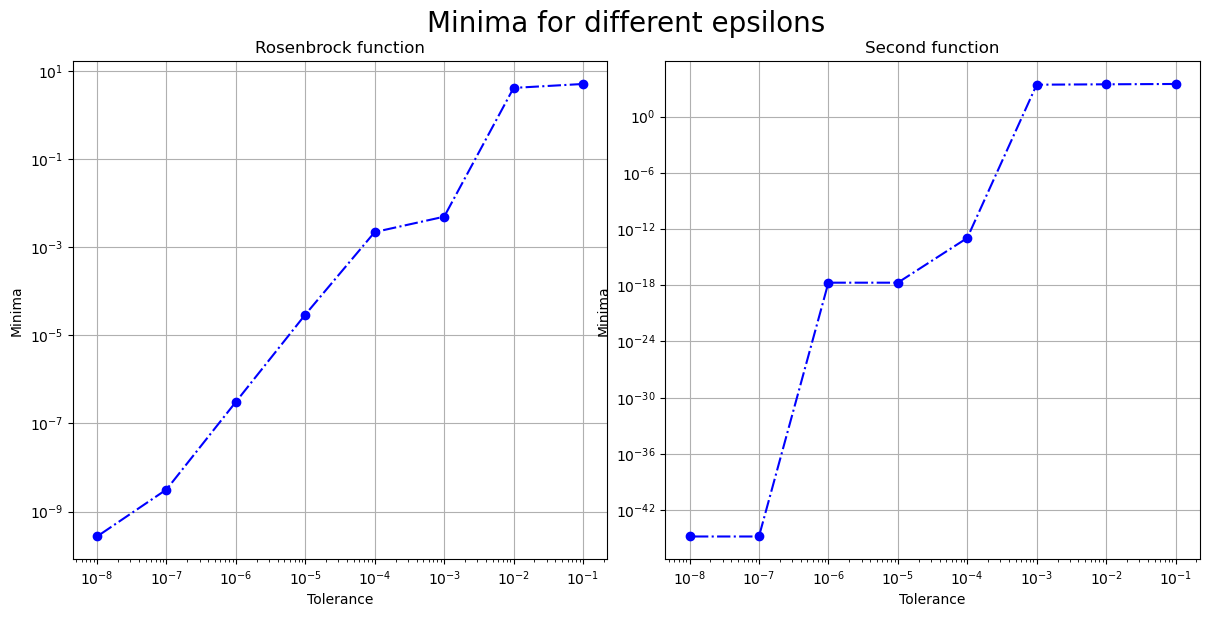

In [124]:
task_a_and_b()
print()
task_a_and_b_2()